# Machine learning basics

**Prediction** 

- Categorical
- Point estimate


**Categorical**

Categorical prediction is a supervised machine learning task that aims to predict a categorical label (or class) for a given input. The categorical labels are discrete and unordered, such as "red," "green," "blue," etc. Categorical prediction is also known as classification. After training, one can use the model to predict new data. 

![alt text](./images/binary_decision_problem.jpg "Title")
![alt text](./images/4_fields.jpg "Title")

Several algorithms can be used for categorical prediction, including:

-    Logistic regression: Logistic regression models the probability of an input belonging to a particular class.

-    Decision trees: A tree-based model that can be used for binary and multi-class classification. Decision trees use a set of if-then-else rules to make predictions.

-    Random forests: A method that combines multiple decision trees to improve the accuracy of the predictions.

-    Support Vector Machines (SVMs): A linear model that can be used for binary and multi-class classification. SVMs find the best boundary (or "hyperplane") that separates the classes. Note there is also a non-linear version of this method.

-    Neural networks: A type of model inspired by the structure of the human brain and can be used for binary and multi-class classification. Neural networks are handy for problems with many input features or a complex decision boundary.


In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score

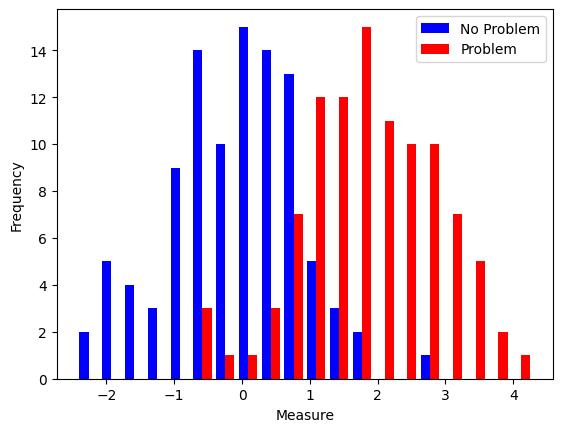

In [68]:
df = pd.read_csv("./datasets/Group_A_B.csv")

plt.hist([df["NoProblem"], df["Problem"]], bins=20, histtype='bar', color=['b','r'], label=['No Problem', 'Problem'])
plt.legend()
plt.xlabel('Measure')
plt.ylabel('Frequency')
plt.show()

**Exercise** Find the optimal threshold value that divides No Problem and Problem

In [69]:
df

,Unnamed: 0,NoProblem,Problem
0,0,1.352766,1.077785
1,1,0.932859,1.761398
2,2,-1.940350,0.889573
3,3,-1.816722,1.454878
4,4,-1.491337,2.085083
...,...,...,...
95,95,-2.088800,0.983390
96,96,-0.029572,4.285581
97,97,1.880704,2.494387
98,98,0.896981,3.725537


**Metrics**

- Accuracy
![alt text](./images/accuracy.jpg "Title")

- Specificity
![alt text](./images/specificity.jpg "Title")

- Precision
![alt text](./images/precision.jpg "Title")

- True positive rate
![alt text](./images/true-positive-rate.jpg "Title")

- False positive rate
![alt text](./images/false-positive-rate.jpg "Title")

- F1 Score
![alt text](./images/f1-score.jpg "Title")

Let's apply a decision boundary (i.e., cutoff value) and calculate the accuracy. Here we calculate an example for a boundary of `Measure == 0` based on a so-called Rule. Note rule-based systems are the simplest prediction models with the advantage that the models are highly transparent and have a high explainability. 

1. We must convert our data frame from wide to long format. This is a central preprocessing step, as all machine learning models we use here work only with long-format data.

In [70]:
df_long = pd.melt(df, id_vars=None, value_vars=['NoProblem', 'Problem'], var_name='Group', value_name='Measure')
df_long

,Group,Measure
0,NoProblem,1.352766
1,NoProblem,0.932859
2,NoProblem,-1.940350
3,NoProblem,-1.816722
4,NoProblem,-1.491337
...,...,...
195,Problem,0.983390
196,Problem,4.285581
197,Problem,2.494387
198,Problem,3.725537


2. Then we apply the rule to our data and create a prediction of which group a person is given a specific measure.

In [71]:
df_long["Predicted Group"] = "NoProblem"
df_long["Predicted Group"][df_long["Measure"] > 0] = "Problem"
df_long

/var/folders/cc/b555j_gn0bx_xc5xhwwyznxc0000gn/T/ipykernel_4335/401138262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_long["Predicted Group"][df_long["Measure"] > 0] = "Problem"


,Group,Measure,Predicted Group
0,NoProblem,1.352766,Problem
1,NoProblem,0.932859,Problem
2,NoProblem,-1.940350,NoProblem
3,NoProblem,-1.816722,NoProblem
4,NoProblem,-1.491337,NoProblem
...,...,...,...
195,Problem,0.983390,Problem
196,Problem,4.285581,Problem
197,Problem,2.494387,Problem
198,Problem,3.725537,Problem


3. We compare the predicted group with the actual group on the accuracy metric

In [72]:
true_positive = len(df_long[df_long["Group"]==df_long["Predicted Group"]][df_long["Predicted Group"] == "Problem"])
true_positive

/var/folders/cc/b555j_gn0bx_xc5xhwwyznxc0000gn/T/ipykernel_4335/1923330692.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  true_positive = len(df_long[df_long["Group"]==df_long["Predicted Group"]][df_long["Predicted Group"] == "Problem"])


96

In [73]:
true_negative = len(df_long[df_long["Group"]==df_long["Predicted Group"]][df_long["Predicted Group"] == "NoProblem"])
true_negative

/var/folders/cc/b555j_gn0bx_xc5xhwwyznxc0000gn/T/ipykernel_4335/3376604202.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  true_negative = len(df_long[df_long["Group"]==df_long["Predicted Group"]][df_long["Predicted Group"] == "NoProblem"])


51

In [74]:
false_positive = len(df_long[df_long["Group"]!=df_long["Predicted Group"]][df_long["Predicted Group"] == "Problem"])
false_positive

/var/folders/cc/b555j_gn0bx_xc5xhwwyznxc0000gn/T/ipykernel_4335/285954077.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  false_positive = len(df_long[df_long["Group"]!=df_long["Predicted Group"]][df_long["Predicted Group"] == "Problem"])


49

In [75]:
false_negative = len(df_long[df_long["Group"]!=df_long["Predicted Group"]][df_long["Predicted Group"] == "NoProblem"])
false_negative

/var/folders/cc/b555j_gn0bx_xc5xhwwyznxc0000gn/T/ipykernel_4335/1528940798.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  false_negative = len(df_long[df_long["Group"]!=df_long["Predicted Group"]][df_long["Predicted Group"] == "NoProblem"])


4

In [76]:
pd.DataFrame(
    {
        "Group: Problem": [true_positive, false_negative],
              "Group: No Problem": [false_positive, true_negative],
              "Predicted": ["Problem", "No Problem"]
    }
)

,Group: Problem,Group: No Problem,Predicted
0,96,49,Problem
1,4,51,No Problem


**Accuracy**
![alt text](./images/accuracy.jpg "Title")

In [77]:
(true_positive+true_negative) / (true_positive+true_negative+false_negative+false_positive)

0.735

**False positive rate**
![alt text](./images/false-positive-rate.jpg "Title")


In [78]:
false_positive / (true_negative+false_positive)

0.49

**Exercise** Apply your best guess decision boundary to the dataset and estimate the Accuracy and the Specificity metric

**First Machine Learning Example: Logistic Regression**

Let's use a logistic regression model to learn the optimal decision boundary for our problem. 

![alt text](./images/log_reg.jpg "Title")

Remember the overall framework. As a first step, we will learn and predict the existing labels. When this would not result in an accuracy > .5, one would learn that the current measure is not predictive of our labels. If the accuracy is between .5 and 1, we know there is a relation between our measure and our labels. 


![alt text](./images/ml_basics.jpg "Title")


First, we need to do a data transformation.

In [79]:
X = df_long["Measure"].values.reshape(-1, 1)
y = df_long["Group"]

Define the model type and fit the model on the data. 

In [80]:
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

After that, we predict the labels based on our measure and the fitted model. For metrics estimations, we store the prediction in our data frame.

In [81]:
df_long["Predicted Group: Model"] = clf.predict(X)
df_long

,Group,Measure,Predicted Group,Predicted Group: Model
0,NoProblem,1.352766,Problem,Problem
1,NoProblem,0.932859,Problem,Problem
2,NoProblem,-1.940350,NoProblem,NoProblem
3,NoProblem,-1.816722,NoProblem,NoProblem
4,NoProblem,-1.491337,NoProblem,NoProblem
...,...,...,...,...
195,Problem,0.983390,Problem,Problem
196,Problem,4.285581,Problem,Problem
197,Problem,2.494387,Problem,Problem
198,Problem,3.725537,Problem,Problem


Now we estimate the accuracy of the model predictions to compare the fitted model to our models. 

In [82]:
true_positive = len(df_long[df_long["Group"]==df_long["Predicted Group: Model"]][df_long["Predicted Group: Model"] == "Problem"])
false_positive = len(df_long[df_long["Group"]!=df_long["Predicted Group: Model"]][df_long["Predicted Group: Model"] == "Problem"])
true_negative = len(df_long[df_long["Group"]==df_long["Predicted Group: Model"]][df_long["Predicted Group: Model"] == "NoProblem"])
false_negative = len(df_long[df_long["Group"]!=df_long["Predicted Group: Model"]][df_long["Predicted Group: Model"] == "NoProblem"])
(true_positive+true_negative) / (true_positive+true_negative+false_negative+false_positive)

/var/folders/cc/b555j_gn0bx_xc5xhwwyznxc0000gn/T/ipykernel_4335/1657540672.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  true_positive = len(df_long[df_long["Group"]==df_long["Predicted Group: Model"]][df_long["Predicted Group: Model"] == "Problem"])
/var/folders/cc/b555j_gn0bx_xc5xhwwyznxc0000gn/T/ipykernel_4335/1657540672.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  false_positive = len(df_long[df_long["Group"]!=df_long["Predicted Group: Model"]][df_long["Predicted Group: Model"] == "Problem"])
/var/folders/cc/b555j_gn0bx_xc5xhwwyznxc0000gn/T/ipykernel_4335/1657540672.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  true_negative = len(df_long[df_long["Group"]==df_long["Predicted Group: Model"]][df_long["Predicted Group: Model"] == "NoProblem"])
/var/folders/cc/b555j_gn0bx_xc5xhwwyznxc0000gn/T/ipykernel_4335/1657540672.py:4: UserWarning: Boolean Series key will be reindexed

0.855

The `score()` function is also doing the same thing.

In [83]:
clf.score(X, y)

0.855

So in comparison to our model, the accuracy of the fitted model is higher. 

To get the boundary of our model, we can now look at, e.g., the minimum value of the "Problem" Group. 

In [84]:
min(df_long["Measure"][df_long["Predicted Group: Model"]=="Problem"])

0.8717871358147095

To get a better picture, we can now look at the histogram again, showing the result of the model prediction. 

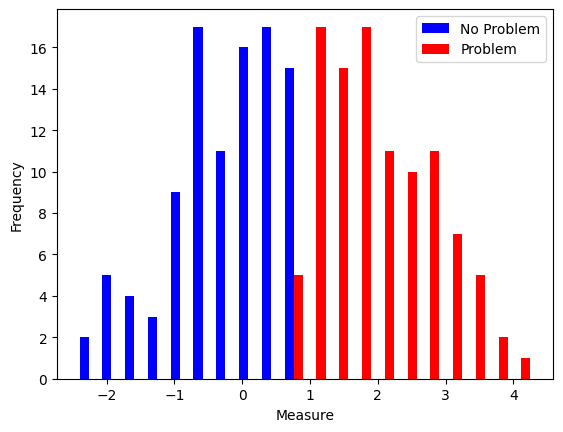

In [85]:
plt.hist([df_long["Measure"][df_long["Predicted Group: Model"]=="NoProblem"], 
         df_long["Measure"][df_long["Predicted Group: Model"]=="Problem"]], 
         bins=20, histtype='bar', color=['b','r'], label=['No Problem', 'Problem'])
plt.legend()
plt.xlabel('Measure')
plt.ylabel('Frequency')
plt.show()

The `0.87` value is the best solution the model could find. Considering that the accuracy is the highest. 

**Exercise** Think about that approach and what might be problems here.

**Train-Test split**

The train-test split is an essential step in the machine-learning process because it allows you to evaluate your model's performance on unseen data.
When you train a machine learning model, you use a dataset to fit the model's parameters to the data. This process is known as training the model. However, using the same data to evaluate the model's performance may achieve high accuracy because it has seen the data before. This phenomenon is known as overfitting. Here the model learned the noise in the training data so that it may perform poorly on new, unseen data.
To overcome this problem, you can split your data into training and test sets. The training set is used to fit the model's parameters, while the test set is used to evaluate the model's performance on unseen data. This allows you to estimate the model's performance on new data and compare different models' performance.

To implement this we use the `train_test_split` function from sklearn. The `test_size` parameter allows you to define the amount of data in the test set in percent (i.e., `0.2` is 20\%).

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(y_train)

160

Then we fit the model only on the train data and score it on the test data.

In [87]:
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.85625
0.85


The score on the training data indicates if we can learn something from the data and the test data indicates if the model can generalize to new data.  


So lets do this again but with a differen classificatioin algorithm. So that one can compare models. The `RandomForestClassifier` function allows to fit a random forest model. 

In [88]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)

And now we can look a the model performance again

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9
0.8


**Exercise** Define a decision tree clasifier `DecisionTreeClassifier()` and compare the performance to the other two models.

**Cross Validation**

Cross-validation allows you to evaluate your model's performance on multiple subsets of your data rather than just a single train-test split. Therefore it provides a more robust estimate of your model's performance and reduces the risk of overfitting (i.e., Regulization method).

![alt text](./images/regularization.jpg "Title")

Cross validation is a good and easy method to reduce the possibility of overfitting. 

![alt text](./images/cv_figure.jpg "Title")

Define the cross-validation method. Here we used the `KFold` method. The parameter `n_splits` allows the sprecification of the number of equal sized random splits (e.g., `n_splits=5` defines that the data will be split in 5 equal sized data parts including randomly drawn cases).

In [90]:
cv = KFold(n_splits=5)

Compute cross-validated accuracy scores. Here the arithmetic mean of the five scores accros all folds is calculated.

In [91]:
scores = cross_val_score(clf, X, y, cv=cv, n_jobs=-1)

Print the mean and standard deviation of the accuracy scores

In [100]:
print(np.mean(scores), np.std(scores))
scores

0.875 0.05229125165837972


array([0.90625, 0.875  , 0.875  , 0.9375 , 0.78125])

**Exercise** Do the Cross-Validation for the three methods we used above and present the scores in a box-plot side by side.

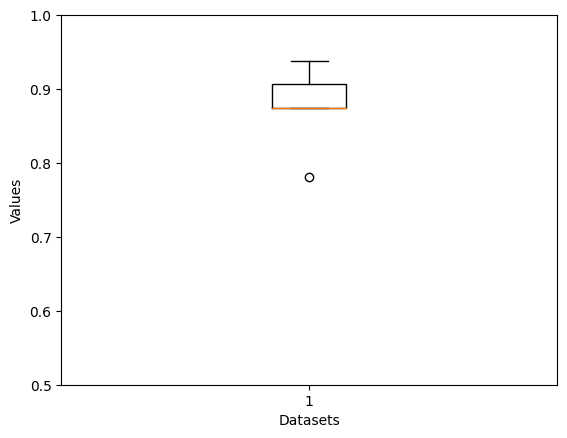

In [101]:
data = {'Random Forest': scores}
df = pd.DataFrame(data)
plt.boxplot(df)
plt.xlabel('Datasets')
plt.ylabel('Values')
plt.ylim(0.5, 1)
#plt.xticks([1, 2], df.columns.tolist())
plt.show()

In a final example we implement the most safe example. In this, like in the figure above, we first split into training and test set and then estimate the parameters within a five fold cross-validation. The model that results from the cross-validation is then used to categorize the testdata. 

First we define a classifier. 

In [94]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)

Do the train/test split with 80%/20% of the data. 

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Next we train the classifier without cross-validation and score the fitted random forest to learn if the data holds patterns that can be trained.

In [96]:
clf.fit(X_train, y_train)
noCV_score = clf.score(X_train, y_train)
print("Score without CV: {}".format(noCV_score))

Score without CV: 0.925


Next step is to get a model based on parameters after implementing a cross-validation.

In [97]:
scores = cross_val_score(clf, X_train, y_train, cv=5)

print("Cross-validation scores: {}".format(scores))
print("Average score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.90625 0.875   0.875   0.9375  0.78125]
Average score: 0.88


Final step is to score the model with the test dataset.

In [98]:
y_pred = clf.predict(X_test)
print("Score on test data with CV model: {}".format(accuracy_score(y_pred,y_test)))

Score on test data with CV model: 0.75


In the end, we have three parameters. Accuracy on the training data with and without cross-validation and the score on the left out test data. 

**Exercise** Describe in one or two sentences what we learn from the tree accuracy measures. 

- 
-
-